##Hi all as we know credit card fraud detection will have a imbalanced data i.e having more number of normal class than the number of fraud class

###In this I will use Basic method of handling imbalance data which are
 ** This all I have done by using Analytics Vidya's blog please find the link [Analytics Vidya](https://www.analyticsvidhya.com/blog/2017/03/read-commonly-used-formats-using-python/)  **

Undersampling:- it means taking the less number of majority class (In our case taking less number of Normal transactions so that our new data will be balanced

Oversampling: it means using replicating the data of minority class (fraud class) so that we can have a balanced data

SMOTE: it is also a type of oversampling but in this we will make the synthetic example of Minority data and will give as a balanced data

First I will start with the Undersampling and will try to classify using these Models
1. Decision Tree Classifier/ Random Forest Classifier

2. Logistic regression

3. SVM

4. XGboost

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # to split the data
from sklearn.model_selection import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\Project_Credit_Card\creditcard.csv")

In [3]:
data.shape

(284807, 31)

In [4]:
# data = data.drop(labels=[ 43428, 116404, 215984, 249239, 146790, 77099, 15810, 261473,
#             280149, 82400, 49906, 29474, 276481, 278846, 101565, 260880, 214337, 201575,
#             81055, 134976], axis=0)
# data.shape

In [3]:
Count_Normal_transacation = len(data[data["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(data[data["Class"]==1]) # fraud by 1
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of fraud transacation",Percentage_of_Fraud_transacation*100)

percentage of normal transacation is 99.82725143693798
percentage of fraud transacation 0.1727485630620034


<AxesSubplot: title={'center': 'Normal Transaction'}, ylabel='Frequency'>

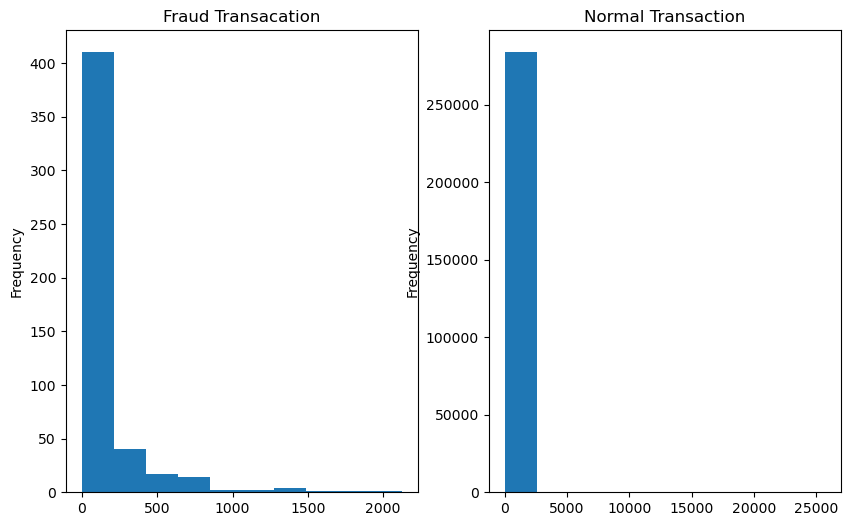

In [4]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

<AxesSubplot: title={'center': 'Normal Transaction'}, ylabel='Frequency'>

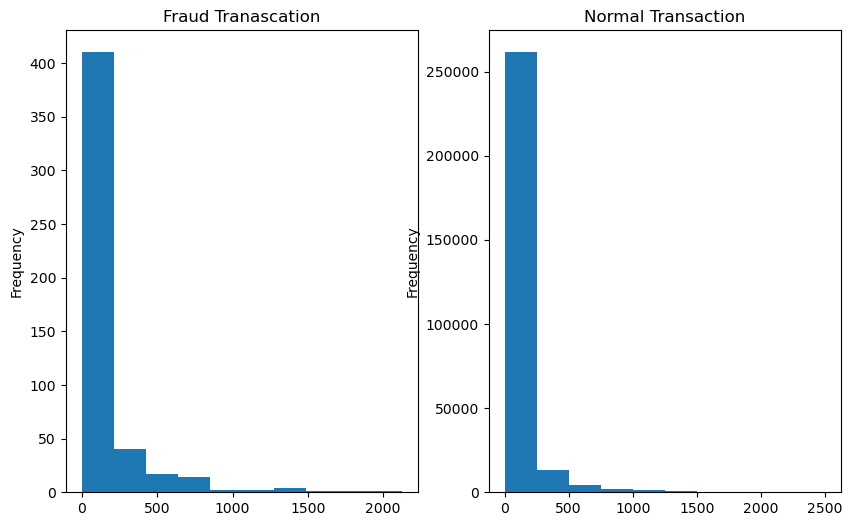

In [5]:
# the distribution for Normal transction is not clear and it seams that all transaction are less than 2.5 K
# So plot graph for same 
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")

In [6]:
# for undersampling we need a portion of majority class and will take whole data of minority class
# count fraud transaction is the total number of fraud transaction
# now lets us see the index of fraud cases
fraud_indices= np.array(data[data.Class==1].index)
normal_indices = np.array(data[data.Class==0].index)
#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data
def undersample(normal_indices,fraud_indices,times):#times denote the normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data = np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    undersample_data = shuffle(undersample_data, random_state=42)
    return(undersample_data)

In [7]:
for i in range(5,50):
    und = undersample(normal_indices, fraud_indices, i%4)
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(und.iloc[:,:-1], und.iloc[:,-1],test_size=0.1, stratify=und.iloc[:,-1])

    clf = RandomForestClassifier(n_estimators=100, max_depth=3)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    cnf_matrix=confusion_matrix(y_test,y_pred)
    #fig, ax = plt.subplots(1, 1, figsize=(15, 8))

    if (recall_score(y_test, y_pred) > 0.9) & (i%4 != 0):
        print(f"\n---------------------recall_score-{clf}--{i%4}-------------------")
        print(recall_score(y_test,y_pred))
        print(cnf_matrix)


---------------------recall_score-RandomForestClassifier(max_depth=3)--1-------------------
0.92
[[49  0]
 [ 4 46]]

---------------------recall_score-RandomForestClassifier(max_depth=3)--1-------------------
0.94
[[49  0]
 [ 3 47]]

---------------------recall_score-RandomForestClassifier(max_depth=3)--3-------------------
0.9387755102040817
[[148   0]
 [  3  46]]


In [8]:
## first make a model function for modeling with confusion matrix
def model(model,X_train,X_test,y_train,y_test):
    clf= model
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    cnf_matrix=confusion_matrix(y_test,y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(7,5))

    sns.heatmap(cnf_matrix, annot=True, fmt="d",cbar=False, cmap="Paired", ax = ax)
    print(recall_score(y_test,y_pred))
    return clf
    # ax.set_title(f"{model}", weight='bold')
    # ax.set_xlabel('Predicted Labels')
    # ax.set_ylabel('Actual Labels')
    # ax.yaxis.label()
    # ax.xaxis.label(['Non-Fraud', 'Fraud'])

In [246]:
import joblib
filename = 'LR_model.sav'
joblib.dump(clf, filename)

['LR_model.sav']

In [84]:
clf

RandomForestClassifier(max_depth=4)

0.8


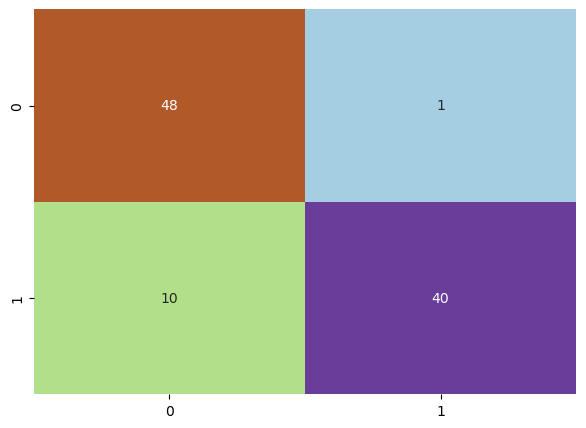

In [169]:
from sklearn.naive_bayes import GaussianNB
und = undersample(normal_indices, fraud_indices, 1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(und.iloc[:,:-1], und.iloc[:,-1],test_size=0.1, stratify=und.iloc[:,-1])
clf = model(GaussianNB(),X_train,X_test,y_train,y_test)

0.9


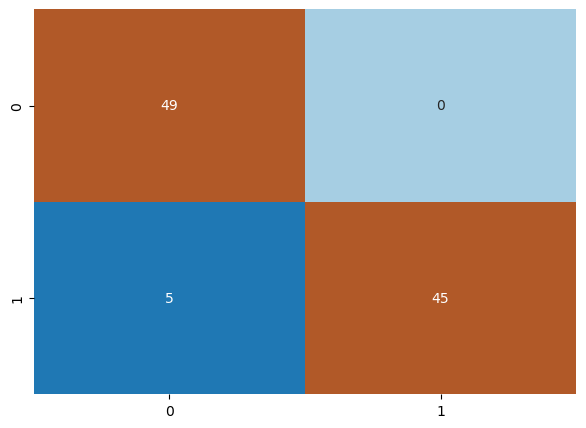

In [65]:
und = undersample(normal_indices, fraud_indices, 1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(und.iloc[:,:-1], und.iloc[:,-1],test_size=0.1, stratify=und.iloc[:,-1])
clf = model(RandomForestClassifier(max_depth=2),X_train,X_test,y_train,y_test)

0.9795918367346939


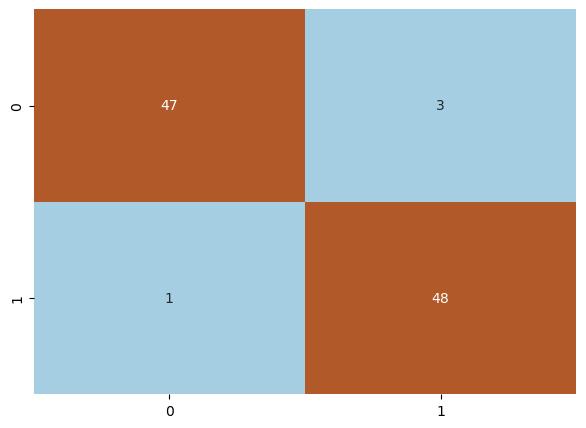

In [244]:
und = undersample(normal_indices, fraud_indices, 1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(und.iloc[:,:-1], und.iloc[:,-1],test_size=0.1, stratify=und.iloc[:,-1])
clf = model(LogisticRegression(),X_train,X_test,y_train,y_test)

In [139]:
def data_prepration(x): # preparing data for training and testing as we are going to use different data 
    #again and again so make a function
    x_features= x.iloc[:,x.columns != "Class"]
    x_labels=x.iloc[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [140]:
#data["Normalized Amount"] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop(["Time","Amount"],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Logistic Regression with Undersample Data

the undersample data for 1 proportion

[   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  26802  27362
  27627  27738  27749  29687  30100  30314  30384  30398  30442  30473
  30496  31002  33276  39183  40085  40525  41395  41569  41943  42007
  42009  42473  42528  42549  42590  42609  42635  42674  42696  42700
  42741  42756  42769  42784  42856  42887  42936  42945  42958  43061
  43160  43204  43428  43624  43681  4

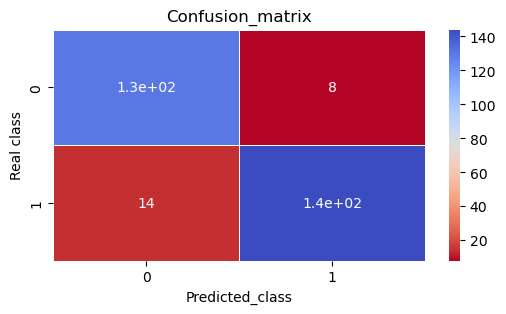


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       138
           1       0.95      0.91      0.93       158

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

________________________________________________________________________________________________________
the undersample data for 2 proportion

[  541   623  4920 ... 35328 64448 79512]
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443

the recall for this model is : 0.8951048951048951
TP 128
TN 289
FP 11
FN 15


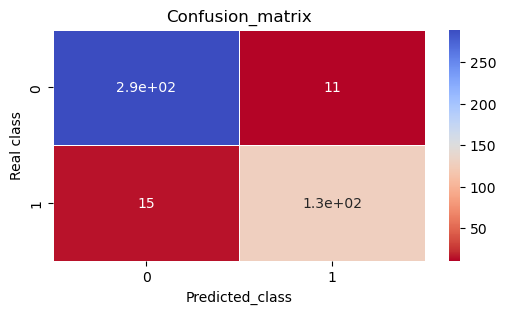


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       300
           1       0.92      0.90      0.91       143

    accuracy                           0.94       443
   macro avg       0.94      0.93      0.93       443
weighted avg       0.94      0.94      0.94       443

________________________________________________________________________________________________________
the undersample data for 3 proportion

[   541    623   4920 ... 192828 103650  76336]
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591

the recall for this model is : 0.8590604026845637
TP 128
TN 439
FP 3
FN 21


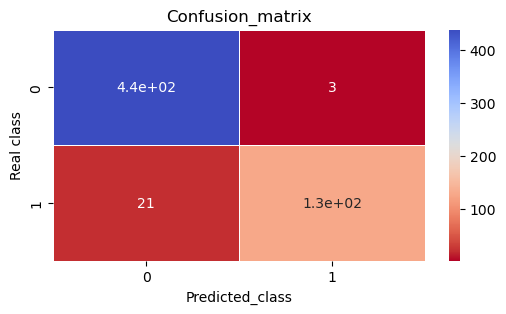


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       442
           1       0.98      0.86      0.91       149

    accuracy                           0.96       591
   macro avg       0.97      0.93      0.94       591
weighted avg       0.96      0.96      0.96       591

________________________________________________________________________________________________________


In [141]:
# Now make undersample data with differnt portion
# here i will take normal trasaction in  0..5 %, 0.66% and 0.75 % proportion of total data now do this for 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    clf=LogisticRegression()
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")

the undersample data for 1 proportion

[   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  26802  27362
  27627  27738  27749  29687  30100  30314  30384  30398  30442  30473
  30496  31002  33276  39183  40085  40525  41395  41569  41943  42007
  42009  42473  42528  42549  42590  42609  42635  42674  42696  42700
  42741  42756  42769  42784  42856  42887  42936  42945  42958  43061
  43160  43204  43428  43624  43681  4

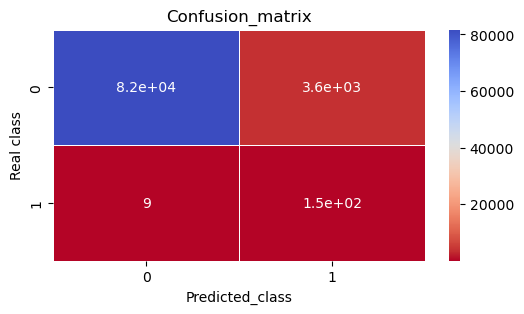


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85280
           1       0.04      0.94      0.08       163

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443

_________________________________________________________________________________________
the undersample data for 2 proportion

[   541    623   4920 ... 261877 279318 213311]
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443
length of training data
199364
length of test data
85443

the recall for this model is : 0.9147286821705426
TP 118
TN 83168
FP 2146
FN 11


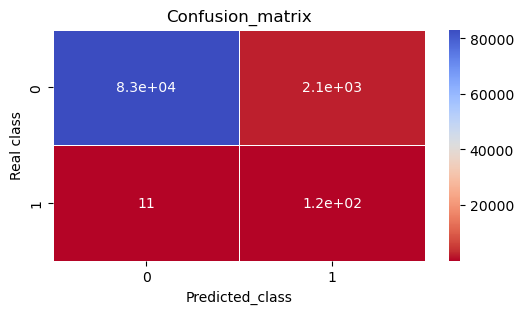


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85314
           1       0.05      0.91      0.10       129

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.54     85443
weighted avg       1.00      0.97      0.99     85443

_________________________________________________________________________________________
the undersample data for 3 proportion

[   541    623   4920 ...  25715 107869 165858]
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591
length of training data
199364
length of test data
85443

the recall for this model is : 0.89937106918239
TP 143
TN 84357
FP 927
FN 16


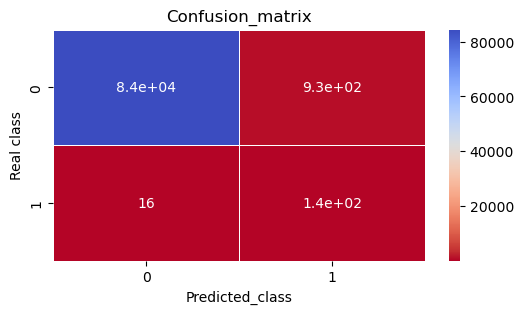


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85284
           1       0.13      0.90      0.23       159

    accuracy                           0.99     85443
   macro avg       0.57      0.94      0.61     85443
weighted avg       1.00      0.99      0.99     85443

_________________________________________________________________________________________


In [143]:
#let us train this model using undersample data and test for the whole data test set 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 
    #the partion for whole data
    print()
    clf=LogisticRegression()
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    # here training for the undersample data but tatsing for whole data
    print("_________________________________________________________________________________________")

1. Here we can see it is following same recall pattern as it  was for under sample data that's sounds good but if we have look at the precision is very less

2. So we should built a model which is correct overall

3. Precision is less means we are predicting other class wrong like as for our third part  there were 953 transaction are predicted fraud it means we and recall is good then it means we are catching fraud transaction very well but we are catching innocent transaction also i.e which are not fraud.

4. So with recall our precision should be better

5. if we go by this model then we are going to put 953 innocents in jail with the all criminal who have actually done this
6. Hence we are mainly lacking in the precision how can we increase our precision
7. Don't get confuse with above output showing that the two training data and two test data first one is for undersample data  while another one is for our whole data

1.Try with SVM and then Random Forest in same Manner

from Random forest we can get which features are more important




        
SVM with Undersample data

the undersample data for 1 proportion

[   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  26802  27362
  27627  27738  27749  29687  30100  30314  30384  30398  30442  30473
  30496  31002  33276  39183  40085  40525  41395  41569  41943  42007
  42009  42473  42528  42549  42590  42609  42635  42674  42696  42700
  42741  42756  42769  42784  42856  42887  42936  42945  42958  43061
  43160  43204  43428  43624  43681  4

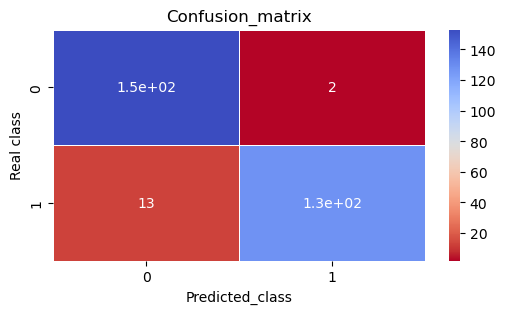


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       155
           1       0.98      0.91      0.94       141

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

________________________________________________________________________________________________________
the undersample data for 2 proportion

[   541    623   4920 ...  89664 114418 150579]
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443

the recall for this model is : 0.85
TP 136
TN 280
FP 3
FN 24


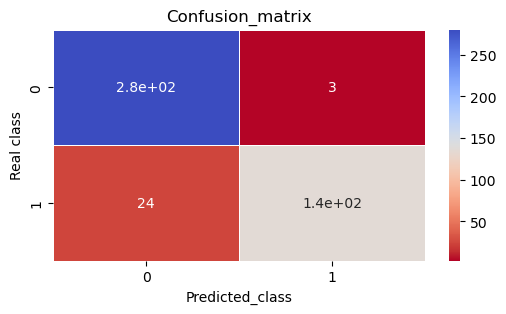


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       283
           1       0.98      0.85      0.91       160

    accuracy                           0.94       443
   macro avg       0.95      0.92      0.93       443
weighted avg       0.94      0.94      0.94       443

________________________________________________________________________________________________________
the undersample data for 3 proportion

[   541    623   4920 ... 225595  82382 284423]
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591

the recall for this model is : 0.8758169934640523
TP 134
TN 434
FP 4
FN 19


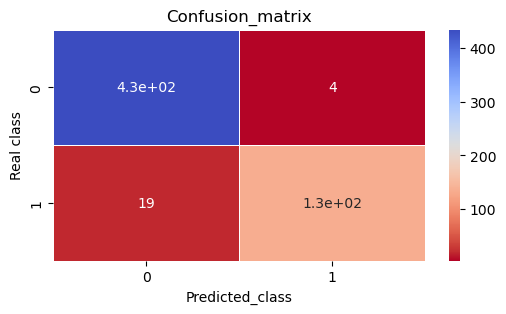


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       438
           1       0.97      0.88      0.92       153

    accuracy                           0.96       591
   macro avg       0.96      0.93      0.95       591
weighted avg       0.96      0.96      0.96       591

________________________________________________________________________________________________________


In [146]:
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    clf= SVC()# here we are just changing classifier
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")

In [100]:
import joblib
# Сохранение модели
filename = 'RF_model.sav'
joblib.dump(clf, filename)

['RF_model.sav']

the undersample data for 1 proportion

[   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  26802  27362
  27627  27738  27749  29687  30100  30314  30384  30398  30442  30473
  30496  31002  33276  39183  40085  40525  41395  41569  41943  42007
  42009  42473  42528  42549  42590  42609  42635  42674  42696  42700
  42741  42756  42769  42784  42856  42887  42936  42945  42958  43061
  43160  43204  43428  43624  43681  4

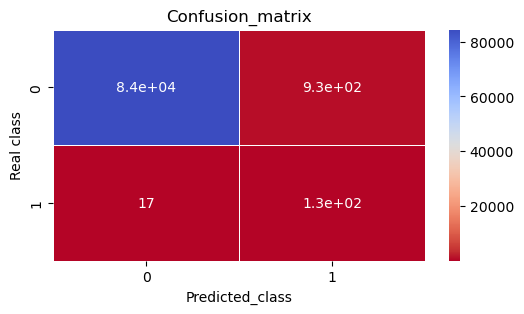


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85294
           1       0.12      0.89      0.22       149

    accuracy                           0.99     85443
   macro avg       0.56      0.94      0.61     85443
weighted avg       1.00      0.99      0.99     85443

_________________________________________________________________________________________
the undersample data for 2 proportion

[   541    623   4920 ... 234926 158855  64828]
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443
length of training data
199364
length of test data
85443

the recall for this model is : 0.9085365853658537
TP 149
TN 84855
FP 424
FN 15


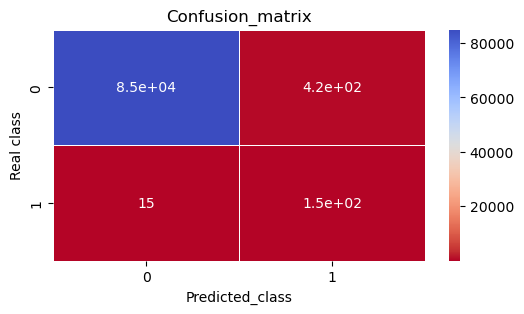


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85279
           1       0.26      0.91      0.40       164

    accuracy                           0.99     85443
   macro avg       0.63      0.95      0.70     85443
weighted avg       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 3 proportion

[   541    623   4920 ...   4189  49209 227141]
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591
length of training data
199364
length of test data
85443

the recall for this model is : 0.8175675675675675
TP 121
TN 85143
FP 152
FN 27


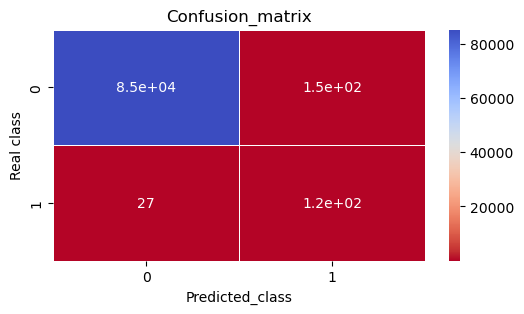


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.44      0.82      0.57       148

    accuracy                           1.00     85443
   macro avg       0.72      0.91      0.79     85443
weighted avg       1.00      1.00      1.00     85443

_________________________________________________________________________________________


In [147]:
#let us train this model using undersample data and test for the whole data test set 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 
    #the partion for whole data
    print()
    clf=SVC()
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    # here training for the undersample data but tatsing for whole data
    print("_________________________________________________________________________________________")

A better recall but precision is not improving much


2 .so to improve precision we must have to tune the hyper parameter of these models



3 That I will do in next version



4 For now lets try with my favorite Random Forest classifier

the undersample data for 1 proportion

[   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  26802  27362
  27627  27738  27749  29687  30100  30314  30384  30398  30442  30473
  30496  31002  33276  39183  40085  40525  41395  41569  41943  42007
  42009  42473  42528  42549  42590  42609  42635  42674  42696  42700
  42741  42756  42769  42784  42856  42887  42936  42945  42958  43061
  43160  43204  43428  43624  43681  4

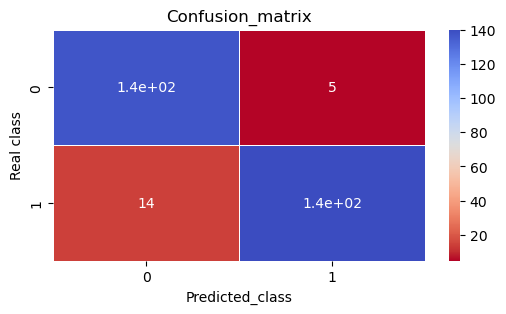


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       142
           1       0.97      0.91      0.94       154

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

________________________________________________________________________________________________________
the undersample data for 2 proportion

[   541    623   4920 ... 281635 239133  82009]
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443

the recall for this model is : 0.8897058823529411
TP 121
TN 301
FP 6
FN 15


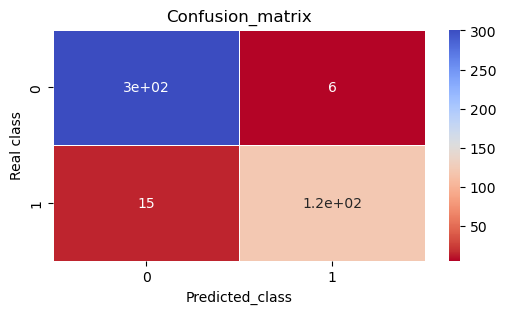


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       307
           1       0.95      0.89      0.92       136

    accuracy                           0.95       443
   macro avg       0.95      0.94      0.94       443
weighted avg       0.95      0.95      0.95       443

________________________________________________________________________________________________________
the undersample data for 3 proportion

[   541    623   4920 ...  81493 194994  34731]
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591

the recall for this model is : 0.8926174496644296
TP 133
TN 441
FP 1
FN 16


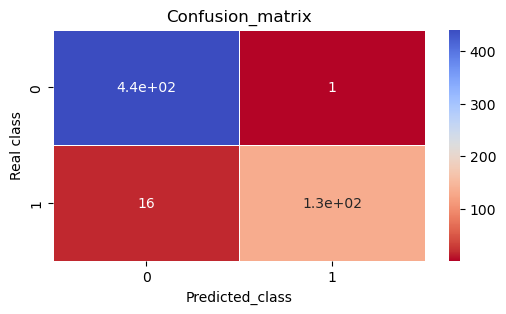


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       442
           1       0.99      0.89      0.94       149

    accuracy                           0.97       591
   macro avg       0.98      0.95      0.96       591
weighted avg       0.97      0.97      0.97       591

________________________________________________________________________________________________________


In [148]:
# Random Forest Classifier with undersample data only
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    clf= RandomForestClassifier(n_estimators=100)# here we are just changing classifier
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")

the undersample data for 1 proportion

[   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  26802  27362
  27627  27738  27749  29687  30100  30314  30384  30398  30442  30473
  30496  31002  33276  39183  40085  40525  41395  41569  41943  42007
  42009  42473  42528  42549  42590  42609  42635  42674  42696  42700
  42741  42756  42769  42784  42856  42887  42936  42945  42958  43061
  43160  43204  43428  43624  43681  4

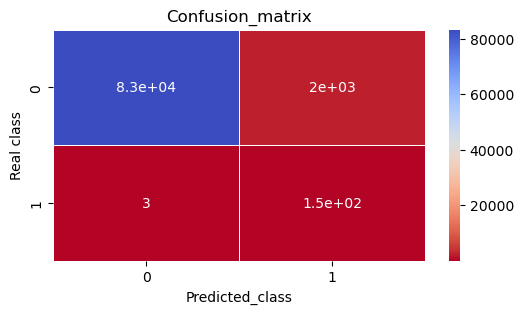


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85286
           1       0.07      0.98      0.13       157

    accuracy                           0.98     85443
   macro avg       0.54      0.98      0.56     85443
weighted avg       1.00      0.98      0.99     85443

_________________________________________________________________________________________
the undersample data for 2 proportion

[  541   623  4920 ... 54227 48990 33097]
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443
length of training data
199364
length of test data
85443

the recall for this model is : 0.9459459459459459
TP 140
TN 84352
FP 943
FN 8


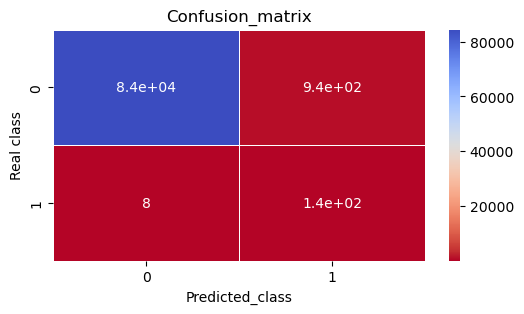


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.13      0.95      0.23       148

    accuracy                           0.99     85443
   macro avg       0.56      0.97      0.61     85443
weighted avg       1.00      0.99      0.99     85443

_________________________________________________________________________________________
the undersample data for 3 proportion

[   541    623   4920 ... 179768 231882  39864]
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591
length of training data
199364
length of test data
85443

the recall for this model is : 0.9782608695652174
TP 135
TN 84399
FP 906
FN 3


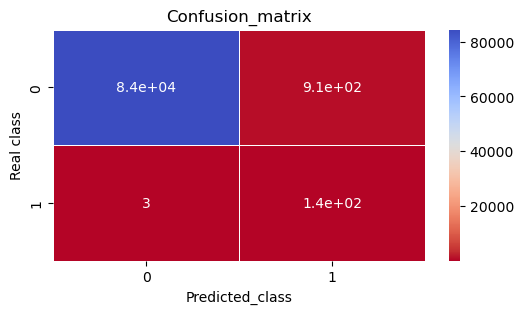


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85305
           1       0.13      0.98      0.23       138

    accuracy                           0.99     85443
   macro avg       0.56      0.98      0.61     85443
weighted avg       1.00      0.99      0.99     85443

_________________________________________________________________________________________


In [149]:
#let us train this model using undersample data and test for the whole data test set 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 
    #the partion for whole data
    print()
    clf=RandomForestClassifier(n_estimators=100)
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    # here training for the undersample data but tatsing for whole data
    print("_________________________________________________________________________________________")

the recall for this model is : 0.9733333333333334
TP 146
TN 83166
FP 2127
FN 4


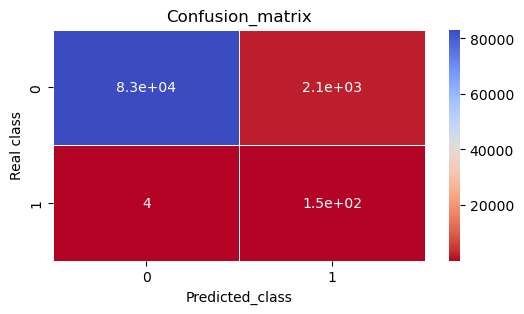


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85293
           1       0.06      0.97      0.12       150

    accuracy                           0.98     85443
   macro avg       0.53      0.97      0.55     85443
weighted avg       1.00      0.98      0.99     85443

the recall for this model is : 0.9733333333333334
TP 146
TN 82811
FP 2482
FN 4


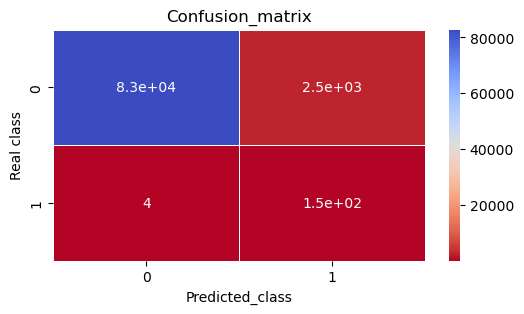


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.06      0.97      0.11       150

    accuracy                           0.97     85443
   macro avg       0.53      0.97      0.55     85443
weighted avg       1.00      0.97      0.98     85443

the recall for this model is : 0.9733333333333334
TP 146
TN 82947
FP 2346
FN 4


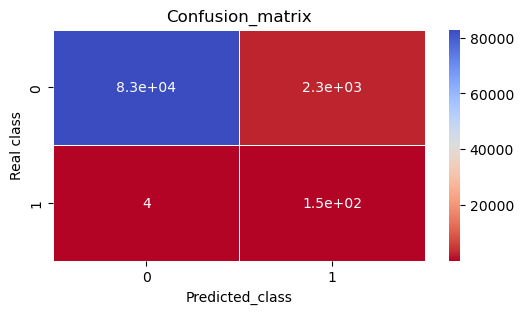


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.06      0.97      0.11       150

    accuracy                           0.97     85443
   macro avg       0.53      0.97      0.55     85443
weighted avg       1.00      0.97      0.98     85443

the recall for this model is : 0.9666666666666667
TP 145
TN 83042
FP 2251
FN 5


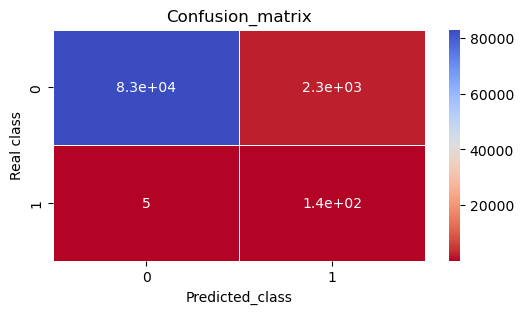


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.06      0.97      0.11       150

    accuracy                           0.97     85443
   macro avg       0.53      0.97      0.55     85443
weighted avg       1.00      0.97      0.99     85443

the recall for this model is : 0.9733333333333334
TP 146
TN 82970
FP 2323
FN 4


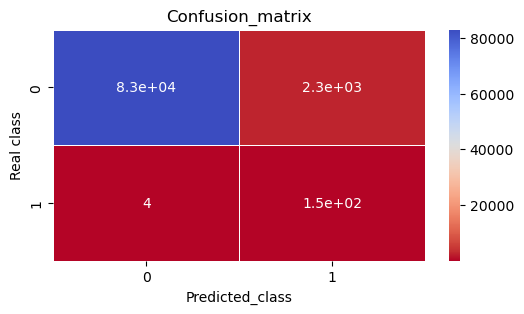


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.06      0.97      0.11       150

    accuracy                           0.97     85443
   macro avg       0.53      0.97      0.55     85443
weighted avg       1.00      0.97      0.98     85443

the recall for this model is : 0.9666666666666667
TP 145
TN 82998
FP 2295
FN 5


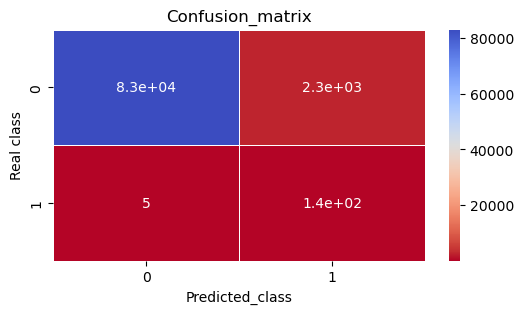


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.06      0.97      0.11       150

    accuracy                           0.97     85443
   macro avg       0.53      0.97      0.55     85443
weighted avg       1.00      0.97      0.98     85443

the recall for this model is : 0.9733333333333334
TP 146
TN 82853
FP 2440
FN 4


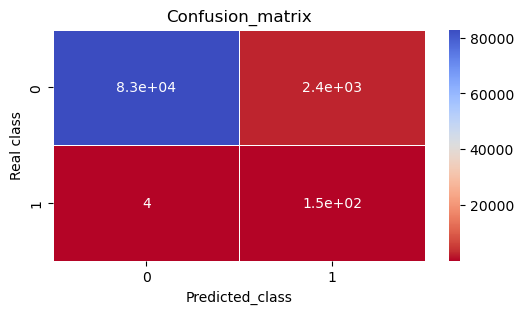


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.06      0.97      0.11       150

    accuracy                           0.97     85443
   macro avg       0.53      0.97      0.55     85443
weighted avg       1.00      0.97      0.98     85443

the recall for this model is : 0.9666666666666667
TP 145
TN 82862
FP 2431
FN 5


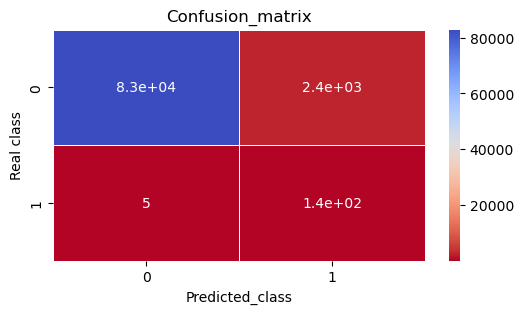


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.06      0.97      0.11       150

    accuracy                           0.97     85443
   macro avg       0.53      0.97      0.55     85443
weighted avg       1.00      0.97      0.98     85443

the recall for this model is : 0.9733333333333334
TP 146
TN 82849
FP 2444
FN 4


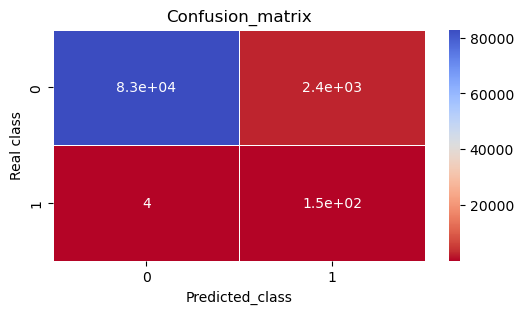


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.06      0.97      0.11       150

    accuracy                           0.97     85443
   macro avg       0.53      0.97      0.55     85443
weighted avg       1.00      0.97      0.98     85443

the recall for this model is : 0.9666666666666667
TP 145
TN 82888
FP 2405
FN 5


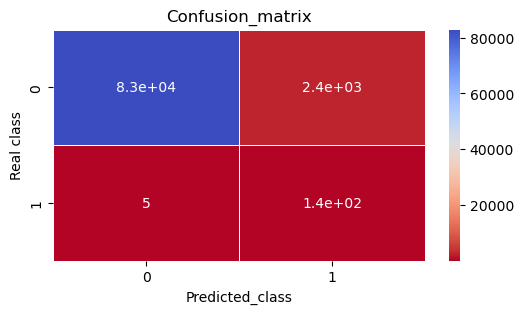


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.06      0.97      0.11       150

    accuracy                           0.97     85443
   macro avg       0.53      0.97      0.55     85443
weighted avg       1.00      0.97      0.98     85443

the recall for this model is : 0.9666666666666667
TP 145
TN 82857
FP 2436
FN 5


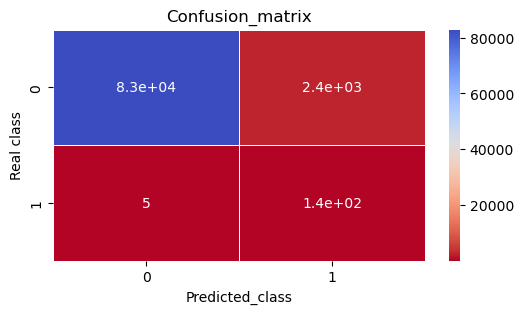


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.06      0.97      0.11       150

    accuracy                           0.97     85443
   macro avg       0.53      0.97      0.55     85443
weighted avg       1.00      0.97      0.98     85443



KeyboardInterrupt: 

In [47]:
for i in range(0, 1111, 11):
    clf=RandomForestClassifier(n_estimators=100, random_state=i)
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)

[   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  26802  27362
  27627  27738  27749  29687  30100  30314  30384  30398  30442  30473
  30496  31002  33276  39183  40085  40525  41395  41569  41943  42007
  42009  42473  42528  42549  42590  42609  42635  42674  42696  42700
  42741  42756  42769  42784  42856  42887  42936  42945  42958  43061
  43160  43204  43428  43624  43681  43773  44001  44091  44223  44270
  4455

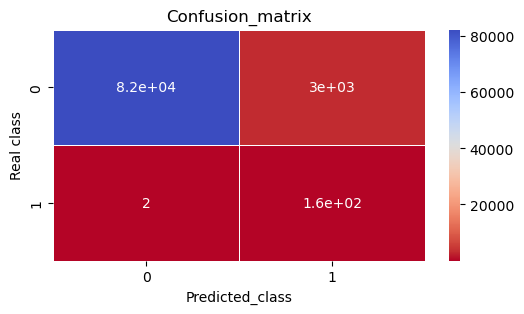


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85281
           1       0.05      0.99      0.10       162

    accuracy                           0.97     85443
   macro avg       0.53      0.98      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [150]:
Undersample_data = undersample(normal_indices,fraud_indices,1)
undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 
clf=RandomForestClassifier(n_estimators=100, random_state=1)
model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)

In [151]:
import joblib
# Сохранение модели
filename = 'RF_model.sav'
joblib.dump(clf, filename)

['RF_model.sav']

In [57]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   V1                 284807 non-null  float64
 1   V2                 284807 non-null  float64
 2   V3                 284807 non-null  float64
 3   V4                 284807 non-null  float64
 4   V5                 284807 non-null  float64
 5   V6                 284807 non-null  float64
 6   V7                 284807 non-null  float64
 7   V8                 284807 non-null  float64
 8   V9                 284807 non-null  float64
 9   V10                284807 non-null  float64
 10  V11                284807 non-null  float64
 11  V12                284807 non-null  float64
 12  V13                284807 non-null  float64
 13  V14                284807 non-null  float64
 14  V15                284807 non-null  float64
 15  V16                284807 non-null  float64
 16  V1